Importo librerías

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

In [34]:
sa = np.random.poisson(100, 100)
sb = sa
print(sa)
np.savetxt('SA.txt', sa, delimiter = '\t')
np.savetxt('SB.txt', sa, delimiter = '\t')

[107 110 104  95 116  77  97  88 103 102 100 101  85 107 100 118  93  98
  90  88  90 100 107  93 105  99 102 101  81  99  97 111  94  90 100 108
  97  89  94 101 100  85  93  88 101 102 121 108 114  89 112 102  79 109
 109 109 113  77  90 115 100  84 100  92 102 116  89  97  90  91 108  92
 101 104 113 112  88  95 105 102  93  92 105  93  95  92  99  93  99  99
 116 103 112  85  85 107 102  85  89 108]


In [35]:
for i in range(2):
    if i == 0:
        fa = np.random.poisson(50, 100)
        np.savetxt('FA.txt', fa, delimiter = '\t')
    else:
        fb = np.random.poisson(50, 100)
        np.savetxt('FB.txt', fb, delimiter = '\t')

print(fa)
print(fb)

[44 47 39 59 39 48 45 65 41 66 50 51 57 43 42 49 65 43 58 45 44 52 50 46
 36 40 50 56 47 44 42 52 49 55 66 58 56 43 52 46 58 47 38 50 66 42 54 48
 41 63 42 51 61 40 44 44 49 38 56 46 52 48 51 44 52 44 45 47 50 64 54 57
 51 46 48 53 42 61 50 47 56 41 51 46 54 39 47 55 54 61 61 52 54 45 62 40
 44 49 50 57]
[49 52 54 52 39 46 48 47 47 51 51 56 55 44 43 59 42 33 46 52 56 52 46 48
 42 53 49 46 54 43 55 45 45 43 57 49 42 52 59 48 52 52 45 63 52 51 53 43
 43 34 53 45 52 51 57 40 45 55 50 33 50 46 50 45 53 52 44 56 54 57 46 51
 66 53 51 54 44 50 58 51 69 46 56 48 55 47 50 54 57 52 57 51 41 49 47 54
 42 49 44 43]


In [36]:
ma = sa + fa
mb = sb + fb

def correlation(a,b):
    a_prom = np.mean(a)
    b_prom = np.mean(b)
    sigma_a = np.sqrt(np.sum((a-a_prom)**2))
    sigma_b = np.sqrt(np.sum((b-b_prom)**2))
    cov_ab = np.sum(np.dot(a-a_prom, b-b_prom))
    return cov_ab/(sigma_a * sigma_b)

print('La correlación es: ', correlation(ma, mb))

La correlación es:  0.6904595792771873


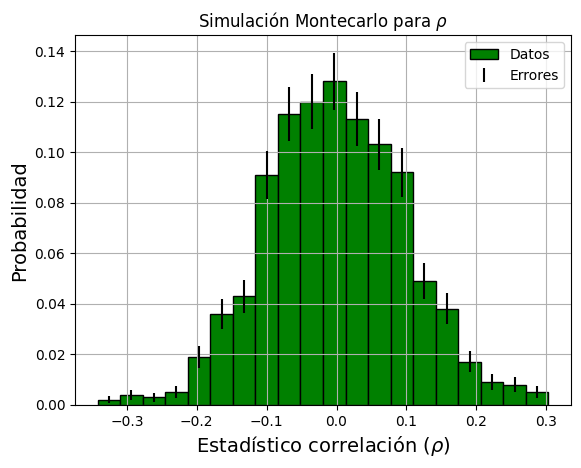

In [37]:
#%% Ejercicio 4

lista = []

for i in range(1000):
    fa_c = np.random.poisson(50, 100)
    fb_d = np.random.poisson(50, 100)
    corr = correlation(fa_c, fb_d)
    lista.append(corr)

hist, bins = np.histogram(lista, bins=20)
hist_norm = hist / np.sum(hist)
errors = np.sqrt(hist)/len(lista)
fig = plt.figure()
plt.bar(bins[:-1], hist_norm, width=np.diff(bins), align = 'edge', color = 'green', edgecolor = 'black', label = 'Datos')
plt.errorbar(bins[:-1] + 0.5 * np.diff(bins), hist_norm, fmt='none', yerr = errors, color = 'black', label = 'Errores')
plt.xlabel("Estadístico correlación ($\\rho$)", fontsize=14)
plt.ylabel("Probabilidad", fontsize=14)
plt.legend()
plt.title('Simulación Montecarlo para $\\rho$')
plt.grid()
plt.show()

Montecarlo

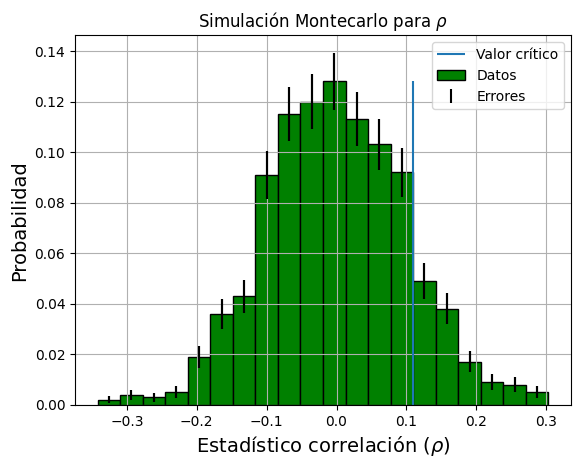

Significancia:  0.126
Valor crítico T_c:  0.10969344312356022


In [38]:
#%% Ejercicio 5

num_bin = 14

hist, bins = np.histogram(lista, bins=20)
hist_norm = hist / np.sum(hist)
fig = plt.figure()
errors = np.sqrt(hist)/len(lista)

plt.bar(bins[:-1], hist_norm, yerr = errors, width=np.diff(bins), align = 'edge', color = 'green', edgecolor = 'black', label = 'Datos')
plt.errorbar(bins[:-1] + 0.5 * np.diff(bins), hist_norm, fmt='none', yerr = errors, color = 'black', label = 'Errores')
plt.xlabel("Estadístico correlación ($\\rho$)", fontsize=14)
plt.ylabel("Probabilidad", fontsize=14)
plt.vlines(bins[num_bin], linestyle = '-', ymin = 0, ymax = max(hist_norm), label = 'Valor crítico')
plt.legend()
plt.grid()
plt.title('Simulación Montecarlo para $\\rho$')
plt.show()

probabilidad =  np.sum(hist[num_bin:])/1000
print('Significancia: ', probabilidad)
print('Valor crítico T_c: ', bins[num_bin])
tc = bins[num_bin]


Test

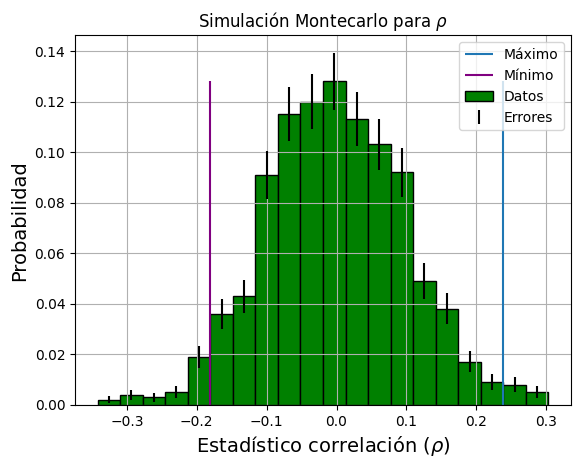

Probabilidad máxima =  0.013
Probabilidad mínima =  0.03300000000000003
Valor crítico máximo:  0.2387007917556968
Valor crítico mínimo:  -0.18057309129874693


In [39]:
#%% Ejercicio 5 (a dos colas)

# Busco los valores críticos
num_bin_max = 18
num_bin_min = 5

hist, bins = np.histogram(lista, bins=20)
hist_norm = hist / np.sum(hist)

fig = plt.figure()
plt.bar(bins[:-1], hist_norm, width=np.diff(bins), align = 'edge', color = 'green', edgecolor = 'black', label = 'Datos')
plt.errorbar(bins[:-1] + 0.5 * np.diff(bins), hist_norm, fmt='none', yerr = errors, color = 'black', label = 'Errores')
plt.xlabel("Estadístico correlación ($\\rho$)", fontsize=14)
plt.ylabel("Probabilidad", fontsize=14)
plt.vlines(bins[num_bin_max], linestyle = '-', ymin = 0, ymax = max(hist_norm), label = 'Máximo')
plt.vlines(bins[num_bin_min], linestyle = '-', ymin = 0, ymax = max(hist_norm), label = 'Mínimo', color = 'purple')
plt.legend()
plt.grid()
plt.title('Simulación Montecarlo para $\\rho$')
plt.show()

probabilidad_max =  np.sum(hist[num_bin_max:])/1000
probabilidad_min = 1 - np.sum(hist[num_bin_min:])/1000
print('Probabilidad máxima = ', probabilidad_max)
print('Probabilidad mínima = ', probabilidad_min)
print('Valor crítico máximo: ', bins[num_bin_max])
print('Valor crítico mínimo: ', bins[num_bin_min])

A dos lados

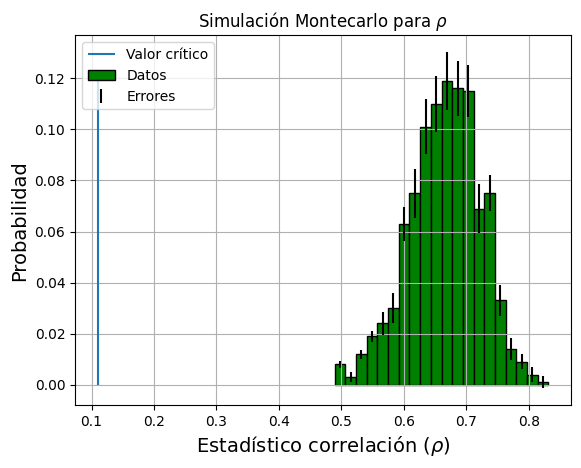

Error tipo 2:  0.0


In [40]:
#%% Ejercicio 6

lista_corr = []

for i in range(1000):
    s = np.random.poisson(100, 100)
    fa_e = np.random.poisson(50, 100)
    fb_f = np.random.poisson(50, 100)
    ma = s + fa_e
    mb = s + fb_f
    corr = correlation(ma, mb)
    lista_corr.append(corr)

hist, bins = np.histogram(lista_corr, bins=20)
hist_norm = hist / np.sum(hist)
fig = plt.figure()
plt.bar(bins[:-1], hist_norm, width=np.diff(bins), align = 'edge', color = 'green', edgecolor = 'black', label = 'Datos')
plt.errorbar(bins[:-1] + 0.5 * np.diff(bins), hist_norm, fmt='none', yerr = errors, color = 'black', label = 'Errores')
plt.xlabel("Estadístico correlación ($\\rho$)", fontsize=14)
plt.ylabel("Probabilidad", fontsize=14)
plt.vlines(tc, linestyle = '-', ymin = 0, ymax = max(hist_norm), label = 'Valor crítico')
plt.legend()
plt.grid()
plt.title('Simulación Montecarlo para $\\rho$')
plt.show()

bin_beta = np.digitize(tc, bins) - 1
potencia = np.sum(hist[bin_beta + 1:])/1000
beta = 1 - potencia
print('Error tipo 2: ', beta)

$\beta$

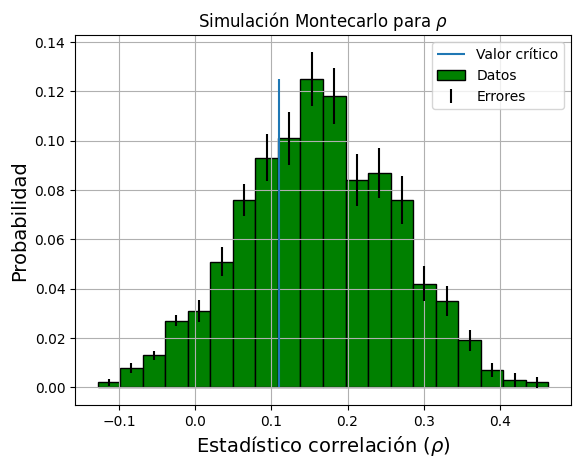

La potencia es:  0.598
El error tipo 2 es:  0.402


In [41]:
#%% Ejercicio 7

lista_corr = []

for i in range(1000):
    s = np.random.poisson(500, 100)
    fa_e = np.random.poisson(2600, 100)
    fb_f = np.random.poisson(2600, 100)
    ma = s + fa_e
    mb = s + fb_f
    corr = correlation(ma, mb)
    lista_corr.append(corr)

hist, bins = np.histogram(lista_corr, bins=20)
hist_norm = hist / np.sum(hist)
fig = plt.figure()
plt.bar(bins[:-1], hist_norm, width=np.diff(bins), align = 'edge', color = 'green', edgecolor = 'black', label = 'Datos')
plt.errorbar(bins[:-1] + 0.5 * np.diff(bins), hist_norm, fmt='none', yerr = errors, color = 'black', label = 'Errores')
plt.xlabel("Estadístico correlación ($\\rho$)", fontsize=14)
plt.ylabel("Probabilidad", fontsize=14)
plt.vlines(tc, linestyle = '-', ymin = 0, ymax = max(hist_norm), label = 'Valor crítico')
plt.legend()
plt.grid()
plt.title('Simulación Montecarlo para $\\rho$')
plt.show()

bin_beta = np.digitize(tc, bins) - 1
potencia = np.sum(hist[bin_beta + 1:])/1000
beta = 1 - potencia

print('La potencia es: ', potencia)
print('El error tipo 2 es: ', beta)

Potencia

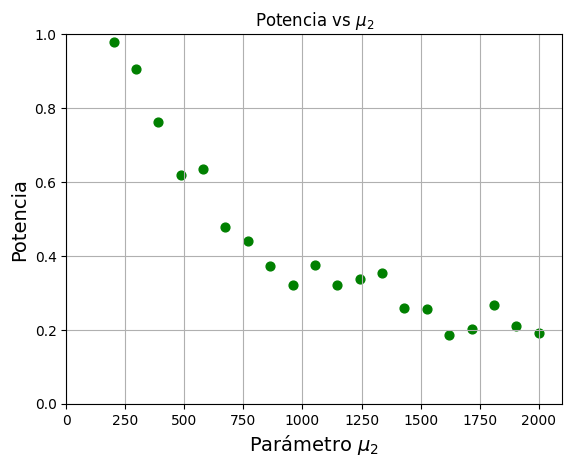

In [42]:
#%% Ejercicio 7 plus

lista_potencia = []
lista_mu2 = []
mu2 = np.linspace(200,2000,20)

for j in mu2:
    lista_corr = []
    for i in range(1000):
        s = np.random.poisson(100, 100)
        fa_e = np.random.poisson(j, 100)
        fb_f = np.random.poisson(j, 100)
        ma = s + fa_e
        mb = s + fb_f
        corr = correlation(ma, mb)
        lista_corr.append(corr)
    hist, bins = np.histogram(lista_corr, bins=20)
    hist_norm = hist / np.sum(hist)
    bin_beta = np.digitize(tc, bins) - 1
    potencia = np.sum(hist[bin_beta + 1:])/1000
    lista_potencia.append(potencia)
    lista_mu2.append(j)

plt.scatter(lista_mu2, lista_potencia, s = 40, color = 'green', label = 'Datos')
plt.xlabel("Parámetro $\\mu_2$", fontsize=14)
plt.ylabel("Potencia", fontsize=14)
plt.title('Potencia vs $\\mu_2$')
plt.grid()
plt.xlim([0, max(mu2) + 100])
plt.ylim([0, 1])
plt.show()

Potencia 2

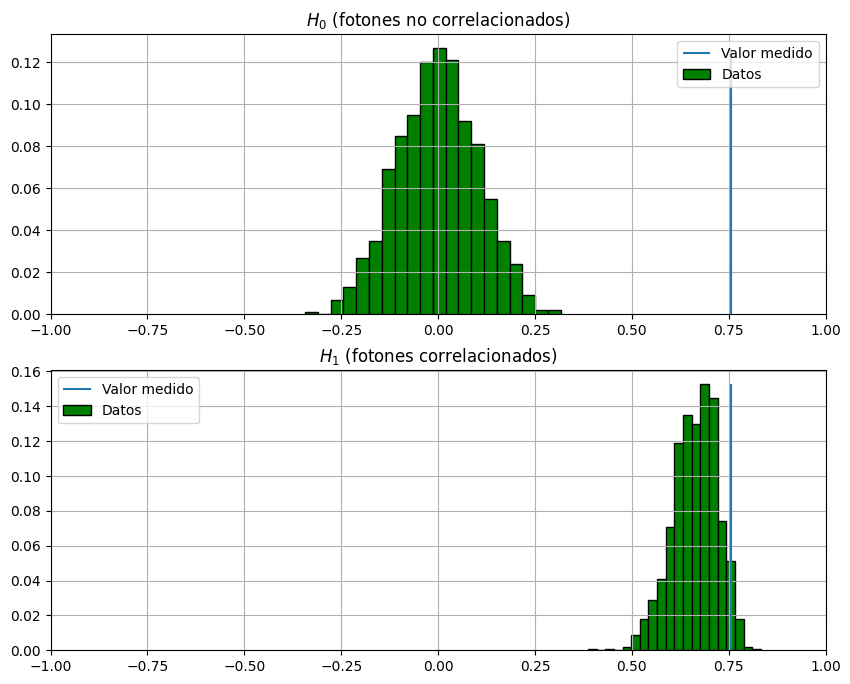

p-valor =  0.0
Valor medido : 0.7561239421955147


In [43]:
#%% Ejercicio 8

# Vuelvo a construir la muestra

ma = s + fa
mb = s + fb

corr_1 = []
corr_2 = []

for i in range(1000):
    s = np.random.poisson(100, 100)
    fa = np.random.poisson(50, 100)
    fb = np.random.poisson(50, 100)
    ma = s + fa
    mb = s + fb
    corr1 = correlation(ma, mb)
    corr2 = correlation(fa, fb)
    corr_1.append(corr1)
    corr_2.append(corr2)

# Genero una sola medición

sz = np.random.poisson(100, 100)
faz = np.random.poisson(50, 100)
fbz = np.random.poisson(50, 100)
maz = sz + faz
mbz = sz + fbz
corr1z = correlation(maz, mbz)

hist_1, bins_1 = np.histogram(corr_2, bins = 20)
hist_norm_1 = hist_1 / np.sum(hist_1)
fig, (ax1, ax2) = plt.subplots(2, 1, figsize = (10, 8))
ax1.bar(bins_1[:-1], hist_norm_1, width=np.diff(bins_1), align = 'edge', color = 'green', edgecolor = 'black', label = 'Datos')

hist_2, bins_2 = np.histogram(corr_1, bins = 20)
hist_norm_2 = hist_2 / np.sum(hist_2)

ax2.bar(bins_2[:-1], hist_norm_2, width=np.diff(bins_2), align = 'edge', color = 'green', edgecolor = 'black', label = 'Datos')
ax1.set_xlim(-1, 1)
ax2.set_xlim(-1, 1)
ax1.set_title('$H_0$ (fotones no correlacionados)')
ax1.vlines(corr1z, linestyle = '-', ymin = 0, ymax = max(hist_norm_1), label = 'Valor medido')
ax2.vlines(corr1z, linestyle = '-', ymin = 0, ymax = max(hist_norm_2), label = 'Valor medido')
ax1.grid()
ax2.grid()
ax1.legend()
ax2.legend()
plt.title('$H_1$ (fotones correlacionados)')
plt.show()

bin_pvalor = np.digitize(corr1z, bins_1) - 1
pvalor = np.sum(hist_1[bin_pvalor:])/1000
print('p-valor = ', pvalor)
print('Valor medido :', corr1z)

Comparación

  0%|          | 0/1000 [00:00<?, ?it/s]

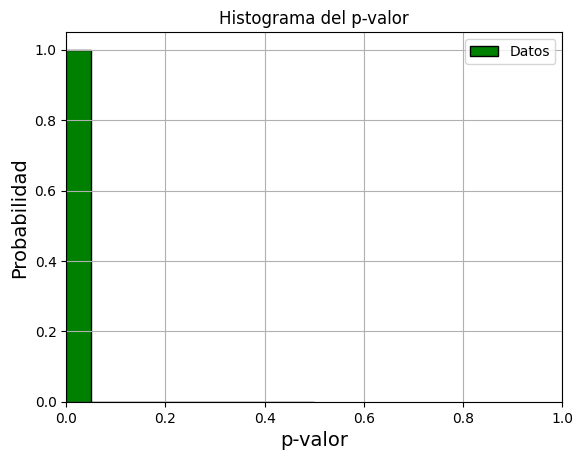

In [44]:
lista_pvalor = []

for j in tqdm(range(1000)):
    ma = s + fa
    mb = s + fb

    corr_1 = []
    corr_2 = []

    for i in range(1000):
        s = np.random.poisson(100, 100)
        fa = np.random.poisson(50, 100)
        fb = np.random.poisson(50, 100)
        ma = s + fa
        mb = s + fb
        corr1 = correlation(ma, mb)
        corr2 = correlation(fa, fb)
        corr_1.append(corr1)
        corr_2.append(corr2)

    # Genero una sola medición

    sz = np.random.poisson(100, 100)
    faz = np.random.poisson(50, 100)
    fbz = np.random.poisson(50, 100)
    maz = sz + faz
    mbz = sz + fbz
    corr1z = correlation(maz, mbz)

    bin_pvalor = np.digitize(corr1z, bins_1) - 1
    pvalor = np.sum(hist_1[bin_pvalor:])/1000
    lista_pvalor.append(pvalor)

hist_pvalor, bins_pvalor = np.histogram(lista_pvalor, bins=20)
hist_norm_pvalor = hist_pvalor / np.sum(hist_pvalor)

fig = plt.figure()
plt.bar(bins_pvalor[:-1], hist_norm_pvalor, width=np.diff(bins_pvalor), align = 'edge', color = 'green', edgecolor = 'black', label = 'Datos')
plt.xlabel('p-valor', fontsize=14)
plt.ylabel("Probabilidad", fontsize=14)
plt.xlim([0,1])
plt.title('Histograma del p-valor')
plt.legend()
plt.grid()
plt.show()

Histograma p-valor